<a href="https://colab.research.google.com/github/sahay-46/shruti_ranjan/blob/main/2348545LAB2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#The pandas library in Python is widely used for data manipulation, analysis, and cleaning. It provides data structures and functions
#designed to make data handling and analysis more convenient and efficient
import pandas as pd
# It provides support for working with large, multi-dimensional arrays and matrices, along with a wide range of mathematical
# functions to operate on these arrays.
import numpy as np
# you've imported the matplotlib.pyplot module.
#This module is a part of the Matplotlib library, which is one of the most widely used Python libraries for creating static,
#interactive, and animated visualizations. The pyplot module provides a simple interface for creating various types of plots and charts.
#When you import matplotlib.pyplot as plt, it's a common convention to make the plotting functions shorter and easier to use by calling
#them with the plt prefix
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data=pd.read_csv('/content/customer_shopping_data.csv')
data.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5.0,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3.0,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1.0,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5.0,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4.0,60.60,Cash,24/10/2021,Kanyon


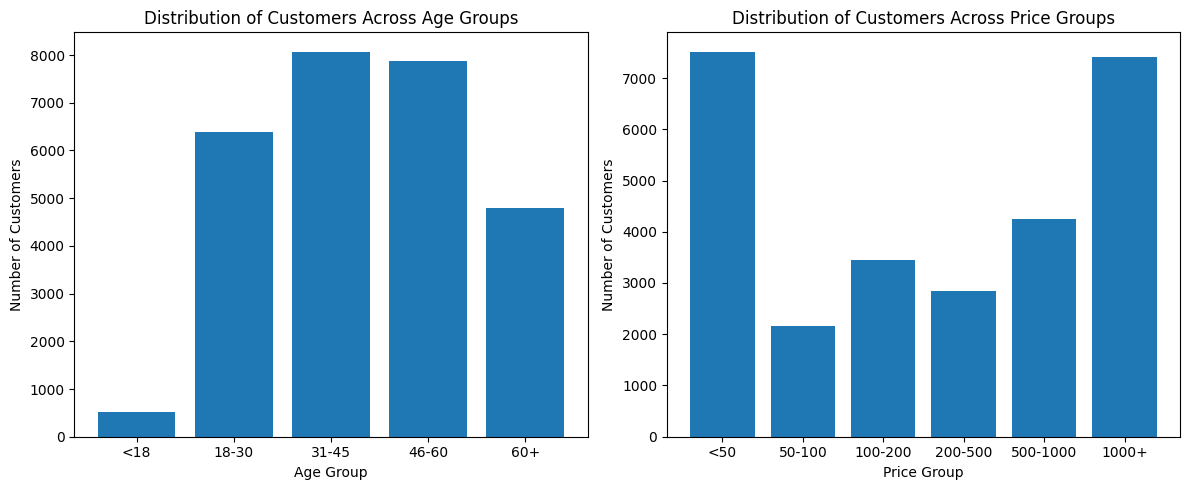

In [6]:
# Define bins and labels for age groups
age_bins = [0, 18, 30, 45, 60, 100]
age_labels = ['<18', '18-30', '31-45', '46-60', '60+']

# Create a new column 'Age Group' by binning the 'age' column
data['Age Group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels)

# Define bins and labels for price groups
price_bins = [0, 50, 100, 200, 500, 1000, float('inf')]
price_labels = ['<50', '50-100', '100-200', '200-500', '500-1000', '1000+']

# Create a new column 'Price Group' by binning the 'price' column
data['Price Group'] = pd.cut(data['price'], bins=price_bins, labels=price_labels)

# Calculate the count of customers in each age group
age_group_counts = data['Age Group'].value_counts().sort_index()

# Calculate the count of customers in each price group
price_group_counts = data['Price Group'].value_counts().sort_index()

# Create bar plots to visualize the distributions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(age_group_counts.index, age_group_counts.values)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers Across Age Groups')

plt.subplot(1, 2, 2)
plt.bar(price_group_counts.index, price_group_counts.values)
plt.xlabel('Price Group')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers Across Price Groups')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply label encoding to 'gender' column
data['gender_encoded'] = label_encoder.fit_transform(data['gender'])

# Perform one-hot encoding on 'payment_method' column
payment_method_dummies = pd.get_dummies(data['payment_method'], prefix='payment')
data = pd.concat([data, payment_method_dummies], axis=1)


# Perform one-hot encoding on 'shopping_mall' column
shopping_mall_dummies = pd.get_dummies(data['shopping_mall'], prefix='mall')
data = pd.concat([data, shopping_mall_dummies], axis=1)

# Display the updated DataFrame with numerical columns
print(data.head())



In [10]:
# Select numerical columns for covariance analysis
numerical_columns = ['age', 'quantity', 'price']  # Add more numerical columns as needed

# Create a subset DataFrame containing only the selected columns
numerical_data = data[numerical_columns]

# Calculate the covariance matrix
covariance_matrix = numerical_data.cov()

# Display the covariance matrix
print(covariance_matrix)

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Display the correlation matrix
print(correlation_matrix)


                 age    quantity          price
age       224.387262    0.343701     102.805659
quantity    0.343701    2.005714     454.171114
price     102.805659  454.171114  889267.495295
               age  quantity     price
age       1.000000  0.016201  0.007278
quantity  0.016201  1.000000  0.340070
price     0.007278  0.340070  1.000000


In [ ]:
# Select numerical columns for covariance analysis
numerical_columns = ['age', 'quantity', 'price']  # Add more numerical columns as needed

# Create a subset DataFrame containing only the selected columns
numerical_data = data[numerical_columns]

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [14]:
from scipy.stats import ttest_ind

# Separate ages for male and female customers
age_male = data[data['gender'] == 'Male']['age']
age_female = data[data['gender'] == 'Female']['age']

# Perform independent t-test
t_statistic, p_value = ttest_ind(age_male, age_female)

# Check the p-value to determine statistical significance
if p_value < 0.05:
    print("The age difference between male and female customers is statistically significant.")
else:
    print("There is no statistically significant age difference between male and female customers.")


There is no statistically significant age difference between male and female customers.


In [15]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(data['payment_method'], data['shopping_mall'])

# Perform chi-squared test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Check the p-value to determine statistical significance
if p_value < 0.05:
    print("There is a significant association between payment method and shopping mall.")
else:
    print("There is no significant association between payment method and shopping mall.")


There is no significant association between payment method and shopping mall.


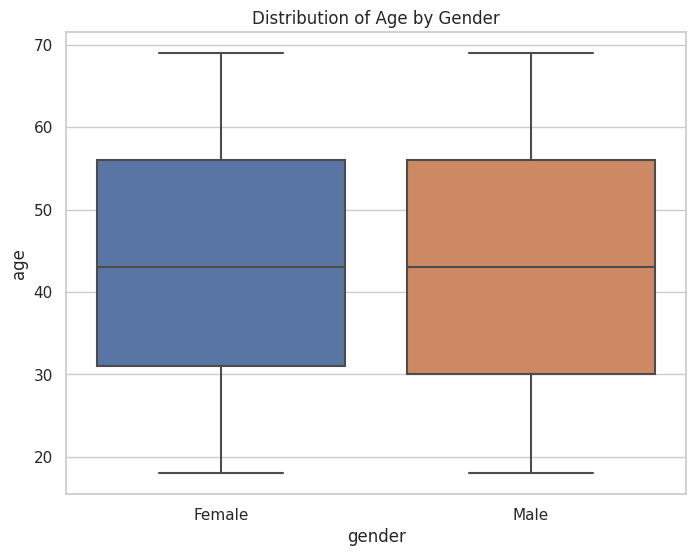

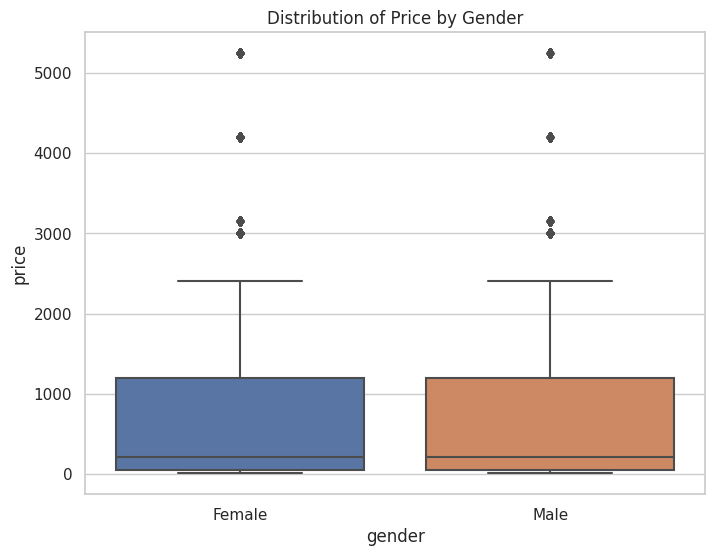

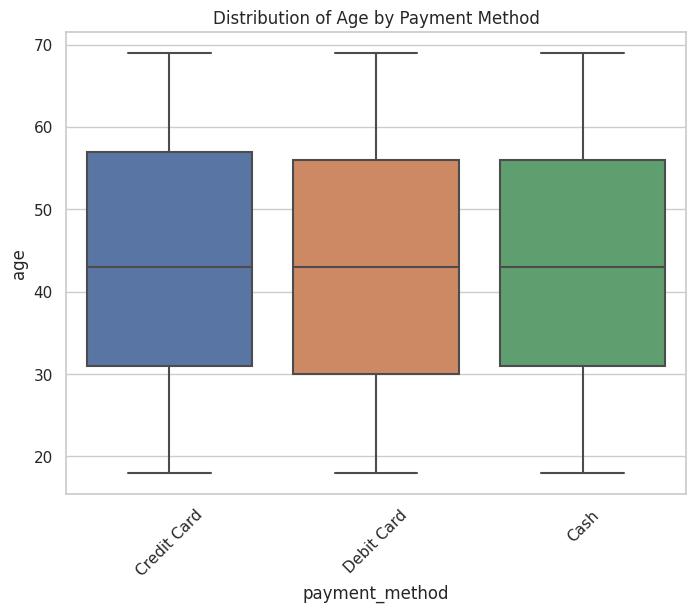

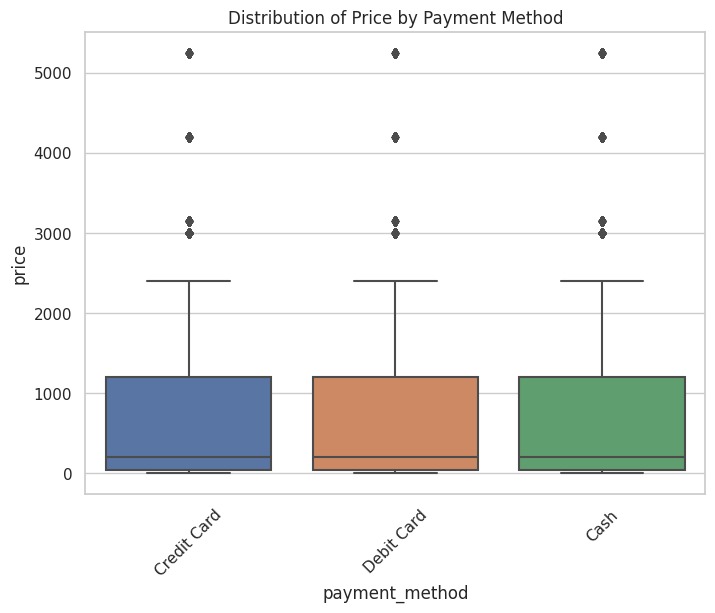

In [16]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Create a box plot for 'age' based on 'gender'
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='age', data=data)
plt.title('Distribution of Age by Gender')
plt.show()

# Create a box plot for 'price' based on 'gender'
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='price', data=data)
plt.title('Distribution of Price by Gender')
plt.show()

# Create a box plot for 'age' based on 'payment_method'
plt.figure(figsize=(8, 6))
sns.boxplot(x='payment_method', y='age', data=data)
plt.title('Distribution of Age by Payment Method')
plt.xticks(rotation=45)
plt.show()

# Create a box plot for 'price' based on 'payment_method'
plt.figure(figsize=(8, 6))
sns.boxplot(x='payment_method', y='price', data=data)
plt.title('Distribution of Price by Payment Method')
plt.xticks(rotation=45)
plt.show()
